In [4]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [11]:
# define instruments to download
companies_dict = {
 'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'Walgreen': 'WBA',
 'Northrop Grumman': 'NOC',
 'Boeing': 'BA',
 'Lockheed Martin':'LMT',
 'McDonalds': 'MCD',
 'Intel': 'INTC',
 'Navistar': 'NAV',
 'IBM': 'IBM',
 'Texas Instruments': 'TXN',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'General Electric': 'GE',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Johnson & Johnson': 'JNJ',
 'Toyota': 'TM',
 'Honda': 'HMC',
 'Exxon': 'XOM',
 'Chevron': 'CVX',
 'Valero Energy': 'VLO',
 'Ford': 'F',
 'Bank of America': 'BAC'
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [12]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2019-01-01'
end_date = '2021-05-20'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2021-05-07', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20'],
              dtype='datetime64[ns]', name='Date', length=601, freq=None), MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close',  'WBA'),
            ('Adj Close',  'NOC'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'LMT'),
            ('Adj Close',  'MCD'),
            ('Adj Close', 'INTC'),
            ('Adj Close',  'NAV'),
            ('Adj Close',  'IBM'),
            ...
            (   'Volume',  'PEP'),
            (   'Volume',   'KO'),
            (   'Volume',  'JNJ'),
            (   'Volume',   'TM'),
            (   'Volume',  '

In [13]:
# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
AMZN    1539.130005
AAPL      39.480000
WBA       68.040001
NOC      246.369995
BA       323.809998
LMT      264.730011
MCD      176.059998
INTC      47.080002
NAV       27.030001
IBM      115.209999
TXN       94.449997
MA       189.740005
MSFT     101.120003
GE         7.740385
AXP       95.680000
PEP      109.279999
KO        46.930000
JNJ      127.750000
TM       116.279999
HMC       26.480000
XOM       69.690002
CVX      110.690002
VLO       75.559998
F          7.900000
BAC       24.959999
Name: 2019-01-02 00:00:00, dtype: float64


In [14]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [15]:
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: -394.9029541015625
Company: Amazon, Change: 31.32238006591797
Company: American Express, Change: -18.750030517578125
Company: Boeing, Change: 39.899932861328125
Company: Bank of America, Change: -189.06050872802734
Company: Chevron, Change: 4.490692138671875
Company: Ford, Change: 8.880325317382812
Company: General Electric, Change: 23.949932098388672
Company: Honda, Change: -9.970009803771973
Company: IBM, Change: 25.890121459960938
Company: Intel, Change: 50.56999969482422
Company: Johnson & Johnson, Change: -24.709457397460938
Company: Coca Cola, Change: 60.869903564453125
Company: Lockheed Martin, Change: -2.875762462615967
Company: MasterCard, Change: 23.81011199951172
Company: McDonalds, Change: 17.050010681152344
Company: Microsoft, Change: -12.23000717163086
Company: Navistar, Change: -0.57989501953125
Company: Northrop Grumman, Change: -20.92010498046875
Company: Pepsi, Change: -1.660013198852539
Company: Toyota, Change: -27.979965209960938
Company: Tex

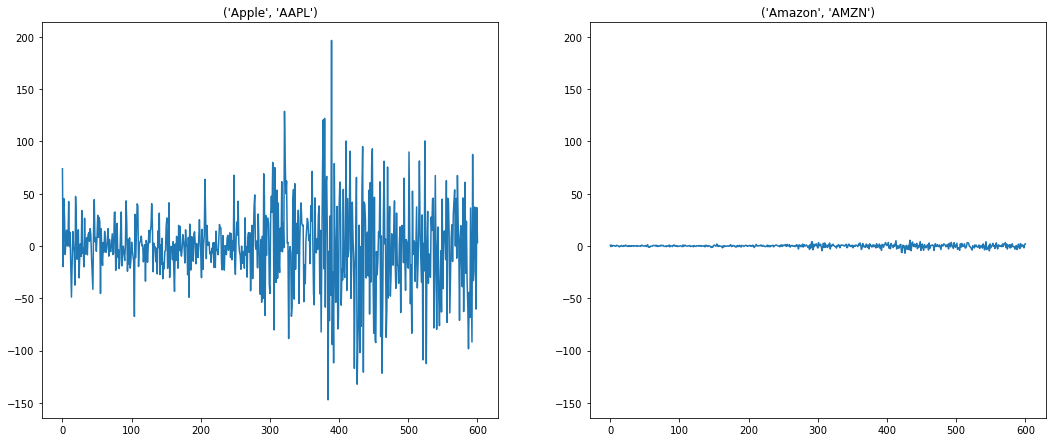

In [16]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [17]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.2815491968478044
-0.4542300193433386
-0.00015605780027384142


In [18]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [19]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [20]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                 companies
8        0              (Honda, HMC)
7        1    (General Electric, GE)
10       1             (Intel, INTC)
19       2              (Pepsi, PEP)
2        2   (American Express, AXP)
18       2   (Northrop Grumman, NOC)
9        2                (IBM, IBM)
3        3              (Boeing, BA)
5        3            (Chevron, CVX)
0        4             (Apple, AAPL)
11       4  (Johnson & Johnson, JNJ)
12       4           (Coca Cola, KO)
1        4            (Amazon, AMZN)
20       5              (Toyota, TM)
21       5  (Texas Instruments, TXN)
22       5      (Valero Energy, VLO)
15       6          (McDonalds, MCD)
16       6         (Microsoft, MSFT)
17       6           (Navistar, NAV)
23       7           (Walgreen, WBA)
14       7          (MasterCard, MA)
24       7              (Exxon, XOM)
13       8    (Lockheed Martin, LMT)
4        8    (Bank of America, BAC)
6        9                 (Ford, F)


In [21]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                 companies
17       0           (Navistar, NAV)
16       0         (Microsoft, MSFT)
15       0          (McDonalds, MCD)
22       1      (Valero Energy, VLO)
21       1  (Texas Instruments, TXN)
20       1              (Toyota, TM)
7        2    (General Electric, GE)
11       2  (Johnson & Johnson, JNJ)
10       2             (Intel, INTC)
6        3                 (Ford, F)
0        4             (Apple, AAPL)
12       4           (Coca Cola, KO)
1        4            (Amazon, AMZN)
2        5   (American Express, AXP)
9        5                (IBM, IBM)
13       6    (Lockheed Martin, LMT)
14       6          (MasterCard, MA)
4        6    (Bank of America, BAC)
24       6              (Exxon, XOM)
23       7           (Walgreen, WBA)
8        7              (Honda, HMC)
5        8            (Chevron, CVX)
3        8              (Boeing, BA)
18       9   (Northrop Grumman, NOC)
19       9              (Pepsi, PEP)


<Figure size 432x288 with 0 Axes>

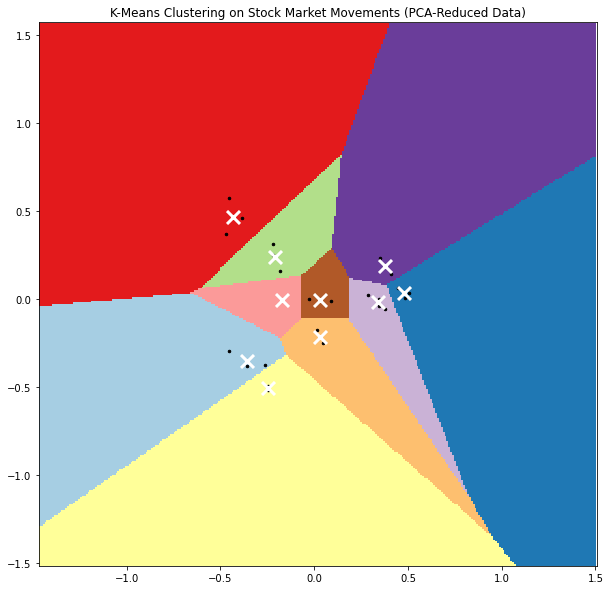

In [22]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()